In [ ]:
import pickle
import random
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import linear_model
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, scale
from sklearn.metrics import classification_report, confusion_matrix
sns.set_style('whitegrid') 

In [ ]:
random.seed(123)



In [ ]:
df = pd.read_csv('/heart.csv')


In [ ]:
df.sample(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
561,65,0,2,155,269,0,1,148,0,0.8,2,0,2,1
107,62,1,1,120,281,0,0,103,0,1.4,1,1,3,0
729,55,0,1,135,250,0,0,161,0,1.4,1,0,2,1
808,51,1,2,94,227,0,1,154,1,0.0,2,1,3,1
631,49,1,1,130,266,0,1,171,0,0.6,2,0,2,1


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# Checking for duplicates
duplicate_data = df[df.duplicated()]
duplicate_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
# Counting the number of duplicate values 
df.duplicated().sum()

723

In [ ]:
# Data set length before removing duplicates
len(df)

1025

In [ ]:
# Removing duplicate data 
df.drop_duplicates(keep='first', inplace=True)

In [ ]:
# Data set length after removing duplicates
len(df)

302

In [ ]:
# double checking for duplicates 
duplicate_data = df[df.duplicated()]
duplicate_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [ ]:
# Counting the number of duplicate values 
df.duplicated().sum()

0

In [ ]:
(df.isnull().sum() * 100 / df.shape[0]).sort_values(ascending=False)


age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
(df.isnull().sum() * 100 / df.shape[0]).sort_values(ascending=False)

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

In [ ]:
# Data Visualisation to understand the heart disease data set
# How does the classes in the categorical features vary in numbers?

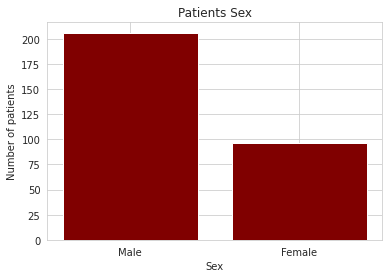

In [ ]:
sex_cat = df['sex'].value_counts().rename_axis("Sex").reset_index(name='Count')
sex_cat = sex_cat.replace({'Sex': {0 : 'Female', 1: 'Male'}})
plt.bar(sex_cat.Sex, sex_cat.Count, color = 'maroon');
plt.title('Patients Sex');
plt.xlabel('Sex');
plt.ylabel('Number of patients');

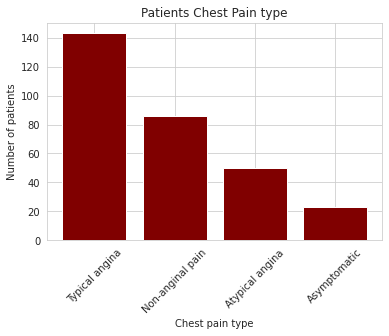

In [ ]:
cp_cat = df['cp'].value_counts().rename_axis("Cp").reset_index(name='Count')
cp_cat = cp_cat.replace({'Cp': {0 : 'Typical angina', 1: 'Atypical angina',
                                2: 'Non-anginal pain', 3: 'Asymptomatic'}})
plt.bar(cp_cat.Cp, cp_cat.Count, color = 'maroon');
plt.title('Patients Chest Pain type');
plt.xlabel('Chest pain type');
plt.ylabel('Number of patients');
plt.xticks(rotation=45);

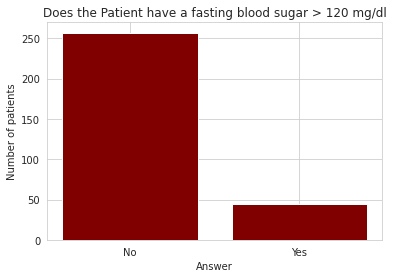

In [ ]:
fbs_cat = df['fbs'].value_counts().rename_axis("Fbs").reset_index(name='Count')
fbs_cat = fbs_cat.replace({'Fbs': {0 : 'No', 1: 'Yes'}})
plt.bar(fbs_cat.Fbs, fbs_cat.Count, color = 'maroon');
plt.title('Does the Patient have a fasting blood sugar > 120 mg/dl');
plt.xlabel('Answer');
plt.ylabel('Number of patients');

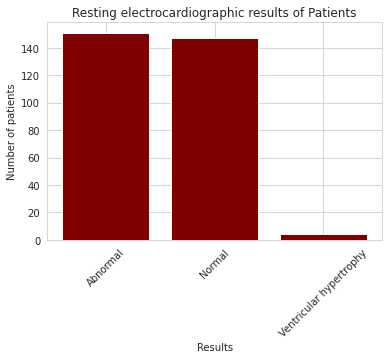

In [ ]:
restecg_cat = df['restecg'].value_counts().rename_axis("Restecg").reset_index(name='Count')
restecg_cat = restecg_cat.replace({'Restecg': {0 : 'Normal', 1: 'Abnormal', 2: 'Ventricular hypertrophy'}})
plt.bar(restecg_cat.Restecg, restecg_cat.Count, color = 'maroon');
plt.title('Resting electrocardiographic results of Patients');
plt.xlabel('Results');
plt.ylabel('Number of patients');
plt.xticks(rotation=45);

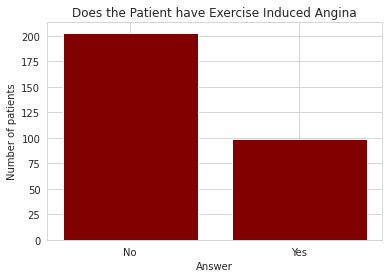

In [ ]:
exang_cat = df['exang'].value_counts().rename_axis("Exang").reset_index(name='Count')
exang_cat = exang_cat.replace({'Exang': {0 : 'No', 1: 'Yes'}})
plt.bar(exang_cat.Exang, exang_cat.Count, color = 'maroon');
plt.title('Does the Patient have Exercise Induced Angina');
plt.xlabel('Answer');
plt.ylabel('Number of patients');


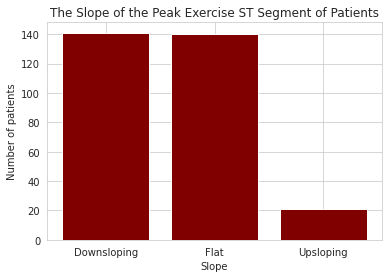

In [ ]:
slope_cat = df['slope'].value_counts().rename_axis("Slope").reset_index(name='Count')
slope_cat = slope_cat.replace({'Slope': {0 : 'Upsloping', 1: 'Flat', 2: 'Downsloping'}})
plt.bar(slope_cat.Slope, slope_cat.Count, color = 'maroon');
plt.title('The Slope of the Peak Exercise ST Segment of Patients');
plt.xlabel('Slope');
plt.ylabel('Number of patients');

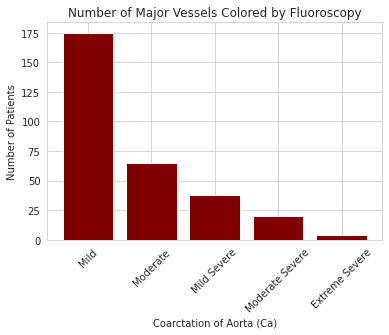

In [ ]:
ca_cat = df['ca'].value_counts().rename_axis("Ca").reset_index(name='Count')
ca_cat = ca_cat.replace({'Ca': {0 : 'Mild', 1: 'Moderate', 2: 'Mild Severe',
                               3: 'Moderate Severe', 4: 'Extreme Severe'}})
plt.bar(ca_cat.Ca, ca_cat.Count, color = 'maroon');
plt.title('Number of Major Vessels Colored by Fluoroscopy');
plt.xlabel('Coarctation of Aorta (Ca)');
plt.ylabel('Number of Patients');
plt.xticks(rotation=45);

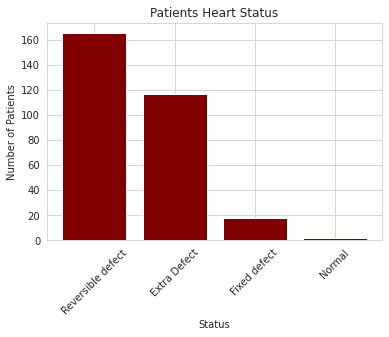

In [ ]:
thal_cat = df['thal'].value_counts().rename_axis("Thal").reset_index(name='Count')
thal_cat = thal_cat.replace({'Thal': {0 : 'Normal', 1: 'Fixed defect', 2: 'Reversible defect',
                               3: 'Extra Defect'}})
plt.bar(thal_cat.Thal, thal_cat.Count, color = 'maroon');
plt.title('Patients Heart Status');
plt.xlabel('Status');
plt.ylabel('Number of Patients');
plt.xticks(rotation=45);

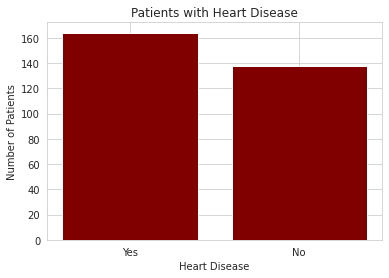

In [ ]:
target_cat = df['target'].value_counts().rename_axis("Target").reset_index(name='Count')
target_cat = target_cat.replace({'Target': {0 : 'No', 1: 'Yes'}})
plt.bar(target_cat.Target, target_cat.Count, color = 'maroon');
plt.title('Patients with Heart Disease');
plt.xlabel('Heart Disease');
plt.ylabel('Number of Patients');

In [ ]:
# How are the numerical features distributed?

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


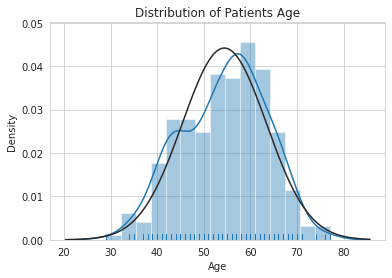

In [ ]:
from scipy.stats import norm, skewnorm, halfcauchy

# Fit a normal distribution to the data to observe if it is normally distributed 
sns.distplot(df.age, rug=True, bins=15, fit=norm);
plt.title('Distribution of Patients Age');
plt.xlabel('Age');

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


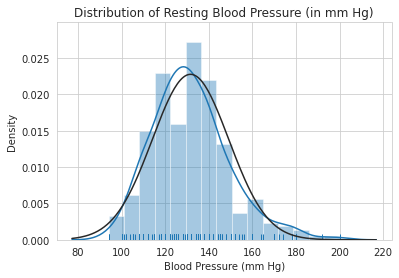

In [ ]:
sns.distplot(df.trestbps, rug=True, bins=15, fit=norm);
plt.title('Distribution of Resting Blood Pressure (in mm Hg)');
plt.xlabel('Blood Pressure (mm Hg)');

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


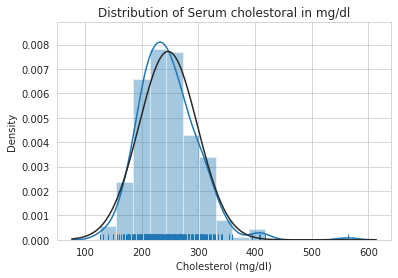

In [ ]:
sns.distplot(df.chol, rug=True, bins=15, fit=norm);
plt.title('Distribution of Serum cholestoral in mg/dl');
plt.xlabel('Cholesterol (mg/dl)');

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


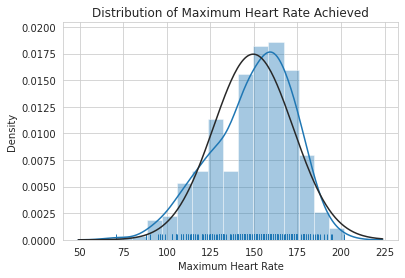

In [ ]:
sns.distplot(df.thalach, rug=True, bins=15, fit=norm);
plt.title('Distribution of Maximum Heart Rate Achieved');
plt.xlabel('Maximum Heart Rate');

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


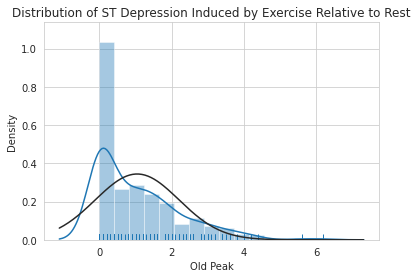

In [ ]:
sns.distplot(df.oldpeak, rug=True, bins=15, fit=norm);
plt.title('Distribution of ST Depression Induced by Exercise Relative to Rest');
plt.xlabel('Old Peak');

In [ ]:
# How does the classes in the categorical features vary in numbers according to the target feature?

In [ ]:
# Make a copy of the original data as a precautionary measure to not modify the source data frame 
data_copy = df.copy()

In [ ]:
# Encode categorical columns with categories for data visualisation understanding 
data_copy = data_copy.replace({'sex': {0 : 'Female', 1: 'Male'},
                              'cp': {0 : 'Typical angina', 1: 'Atypical angina',
                                     2: 'Non-anginal pain', 3: 'Asymptomatic'},
                              'fbs': {0 : 'No', 1: 'Yes'},
                              'restecg': {0 : 'Normal', 1: 'Abnormal', 2: 'Ventricular hypertrophy'},
                              'exang': {0 : 'No', 1: 'Yes'},
                              'slope': {0 : 'Upsloping', 1: 'Flat', 2: 'Downsloping'},
                              'ca': {0 : 'Mild', 1: 'Moderate', 2: 'Mild Severe',
                                     3: 'Moderate Severe', 4: 'Extreme Severe'},
                              'thal': {0 : 'Normal', 1: 'Fixed defect', 2: 'Reversible defect',
                                       3: 'Extra Defect'},
                              'target': {0 : 'No', 1: 'Yes'}})


In [ ]:
data_copy.sample(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
37,59,Male,Typical angina,138,271,No,Normal,182,No,0.0,Downsloping,Mild,Reversible defect,Yes
521,58,Male,Atypical angina,125,220,No,Abnormal,144,No,0.4,Flat,Extreme Severe,Extra Defect,Yes
389,63,Male,Asymptomatic,145,233,Yes,Normal,150,No,2.3,Upsloping,Mild,Fixed defect,Yes
77,63,Male,Typical angina,140,187,No,Normal,144,Yes,4.0,Downsloping,Mild Severe,Extra Defect,No
160,77,Male,Typical angina,125,304,No,Normal,162,Yes,0.0,Downsloping,Moderate Severe,Reversible defect,No
183,42,Male,Non-anginal pain,130,180,No,Abnormal,150,No,0.0,Downsloping,Mild,Reversible defect,Yes
533,53,Female,Typical angina,138,234,No,Normal,160,No,0.0,Downsloping,Mild,Reversible defect,Yes
220,57,Female,Atypical angina,130,236,No,Normal,174,No,0.0,Flat,Moderate,Reversible defect,No
16,51,Female,Non-anginal pain,140,308,No,Normal,142,No,1.5,Downsloping,Moderate,Reversible defect,Yes
367,48,Male,Atypical angina,110,229,No,Abnormal,168,No,1.0,Upsloping,Mild,Extra Defect,No


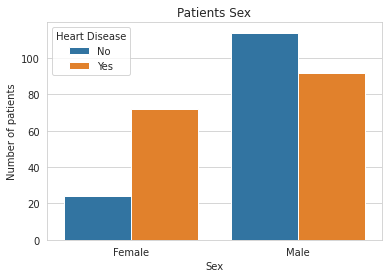

In [ ]:
sex_cls = data_copy.groupby(['sex', 'target']).sex.count().reset_index(name='count')
sns.barplot(x="sex", y="count", data=sex_cls, hue = "target");
plt.title('Patients Sex');
plt.xlabel('Sex');
plt.ylabel('Number of patients');
plt.legend(title = "Heart Disease");

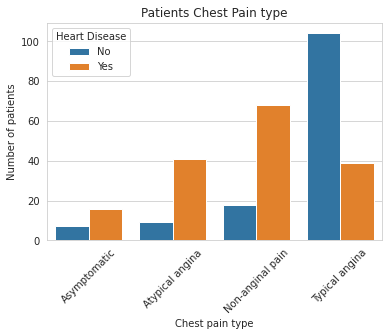

In [ ]:
cp_cls = data_copy.groupby(['cp', 'target']).cp.count().reset_index(name='count')
sns.barplot(x="cp", y="count", data=cp_cls, hue = "target");
plt.title('Patients Chest Pain type');
plt.xlabel('Chest pain type');
plt.ylabel('Number of patients');
plt.xticks(rotation=45);
plt.legend(title = "Heart Disease");

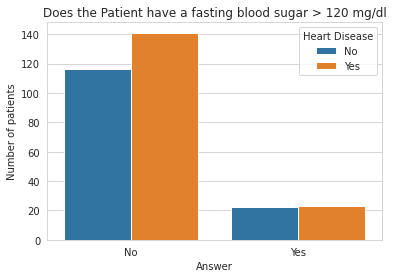

In [ ]:
fbs_cls = data_copy.groupby(['fbs', 'target']).fbs.count().reset_index(name='count')
sns.barplot(x="fbs", y="count", data=fbs_cls, hue = "target");
plt.title('Does the Patient have a fasting blood sugar > 120 mg/dl');
plt.xlabel('Answer');
plt.ylabel('Number of patients');
plt.legend(title = "Heart Disease");

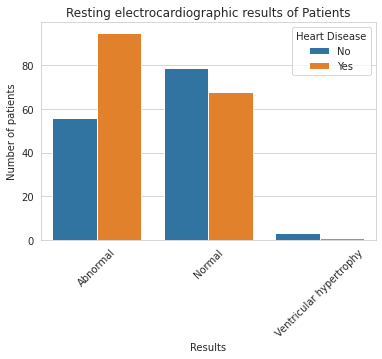

In [ ]:
restecg_cls = data_copy.groupby(['restecg', 'target']).restecg.count().reset_index(name='count')
sns.barplot(x="restecg", y="count", data=restecg_cls, hue = "target");
plt.title('Resting electrocardiographic results of Patients');
plt.xlabel('Results');
plt.ylabel('Number of patients');
plt.xticks(rotation=45);
plt.legend(title = "Heart Disease");

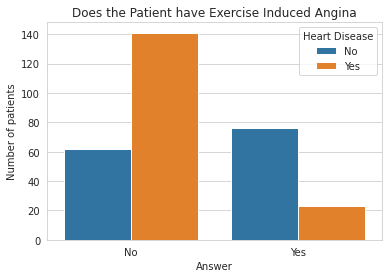

In [ ]:
exang_cls = data_copy.groupby(['exang', 'target']).exang.count().reset_index(name='count')
sns.barplot(x="exang", y="count", data=exang_cls, hue = "target");
plt.title('Does the Patient have Exercise Induced Angina');
plt.xlabel('Answer');
plt.ylabel('Number of patients');
plt.legend(title = "Heart Disease");

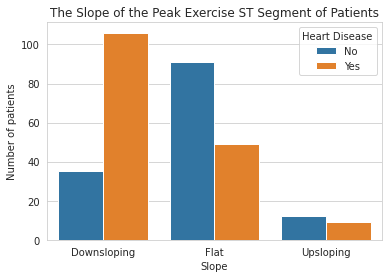

In [ ]:
slope_cls = data_copy.groupby(['slope', 'target']).slope.count().reset_index(name='count')
sns.barplot(x="slope", y="count", data=slope_cls, hue = "target");
plt.title('The Slope of the Peak Exercise ST Segment of Patients');
plt.xlabel('Slope');
plt.ylabel('Number of patients');
plt.legend(title = "Heart Disease");

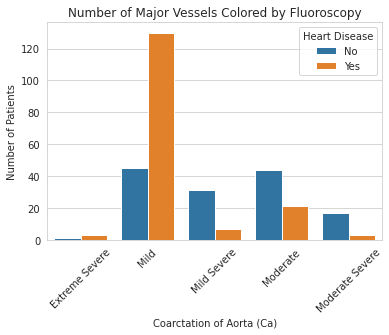

In [ ]:
ca_cls = data_copy.groupby(['ca', 'target']).ca.count().reset_index(name='count')
sns.barplot(x="ca", y="count", data=ca_cls, hue = "target");
plt.title('Number of Major Vessels Colored by Fluoroscopy');
plt.xlabel('Coarctation of Aorta (Ca)');
plt.ylabel('Number of Patients');
plt.xticks(rotation=45);
plt.legend(title = "Heart Disease");

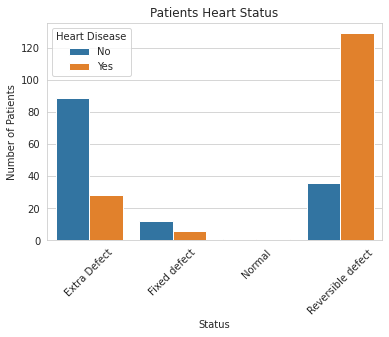

In [ ]:
thal_cls = data_copy.groupby(['thal', 'target']).thal.count().reset_index(name='count')
sns.barplot(x="thal", y="count", data=thal_cls, hue = "target");
plt.title('Patients Heart Status');
plt.xlabel('Status');
plt.ylabel('Number of Patients');
plt.xticks(rotation=45);
plt.legend(title = "Heart Disease");

In [ ]:
# How are the numerical features distributed according to the target feature

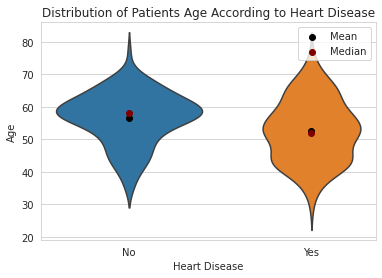

In [ ]:
sns.set_style('whitegrid') # grid to easily make sense of numbers in plots
cust_col = ["#1f77b4", "#ff7f0e"] # own custom color scheme 
sns.set_palette(cust_col) # set color scheme

age_mean = data_copy.groupby('target')['age'].mean() # calculate group mean
age_median = data_copy.groupby('target')['age'].median() # calculate group median 
age_order = data_copy.groupby('target')['age'].mean().iloc[::1].index # calculate mean for grouping according to mean
sns.violinplot(x='target', y='age', data=data_copy, inner=None, order=age_order);
plt.title('Distribution of Patients Age According to Heart Disease');
plt.xlabel('Heart Disease');
plt.ylabel('Age');
plt.scatter(x=range(len(age_mean)),y=age_mean,c="k", label = "Mean");
plt.scatter(x=range(len(age_median)),y=age_median, c="maroon", label = "Median");
plt.legend();

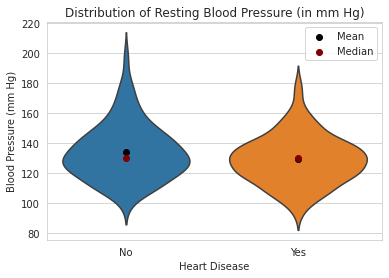

In [ ]:
trestbps_mean = data_copy.groupby('target')['trestbps'].mean() 
trestbps_median = data_copy.groupby('target')['trestbps'].median() 
trestbps_order = data_copy.groupby('target')['trestbps'].mean().iloc[::1].index 
sns.violinplot(x='target', y='trestbps', data=data_copy, inner=None, order=trestbps_order);
plt.title('Distribution of Resting Blood Pressure (in mm Hg)');
plt.xlabel('Heart Disease');
plt.ylabel('Blood Pressure (mm Hg)');
plt.scatter(x=range(len(trestbps_mean)),y=trestbps_mean,c="k", label = "Mean");
plt.scatter(x=range(len(trestbps_median)),y=trestbps_median, c="maroon", label = "Median");
plt.legend();

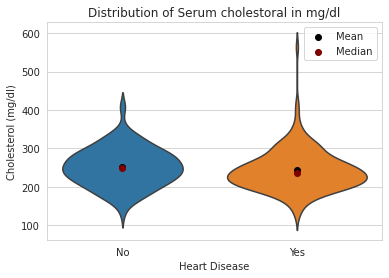

In [ ]:
chol_mean = data_copy.groupby('target')['chol'].mean() 
chol_median = data_copy.groupby('target')['chol'].median() 
chol_order = data_copy.groupby('target')['chol'].mean().iloc[::1].index 
sns.violinplot(x='target', y='chol', data=data_copy, inner=None, order=chol_order);
plt.title('Distribution of Serum cholestoral in mg/dl');
plt.xlabel('Heart Disease');
plt.ylabel('Cholesterol (mg/dl)');
plt.scatter(x=range(len(chol_mean)),y=chol_mean,c="k", label = "Mean");
plt.scatter(x=range(len(chol_median)),y=chol_median, c="maroon", label = "Median");
plt.legend();

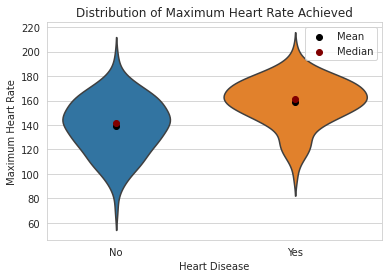

In [ ]:
thalach_mean = data_copy.groupby('target')['thalach'].mean() 
thalach_median = data_copy.groupby('target')['thalach'].median() 
thalach_order = data_copy.groupby('target')['thalach'].mean().iloc[::1].index 
sns.violinplot(x='target', y='thalach', data=data_copy, inner=None, order=thalach_order);
plt.title('Distribution of Maximum Heart Rate Achieved');
plt.xlabel('Heart Disease');
plt.ylabel('Maximum Heart Rate');
plt.scatter(x=range(len(thalach_mean)),y=thalach_mean,c="k", label = "Mean");
plt.scatter(x=range(len(thalach_median)),y=thalach_median, c="maroon", label = "Median");
plt.legend();

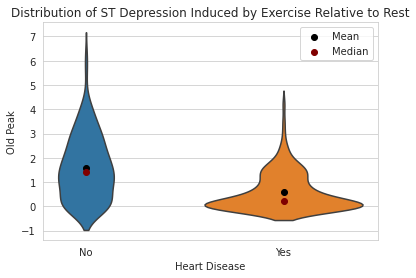

In [ ]:
oldpeak_mean = data_copy.groupby('target')['oldpeak'].mean() 
oldpeak_median = data_copy.groupby('target')['oldpeak'].median() 
oldpeak_order = data_copy.groupby('target')['oldpeak'].mean().iloc[::1].index 
sns.violinplot(x='target', y='oldpeak', data=data_copy, inner=None, order=oldpeak_order);
plt.title('Distribution of ST Depression Induced by Exercise Relative to Rest');
plt.xlabel('Heart Disease');
plt.ylabel('Old Peak');
plt.scatter(x=range(len(oldpeak_mean)),y=oldpeak_mean,c="k", label = "Mean");
plt.scatter(x=range(len(oldpeak_median)),y=oldpeak_median, c="maroon", label = "Median");
plt.legend();

In [ ]:
# Class Representation

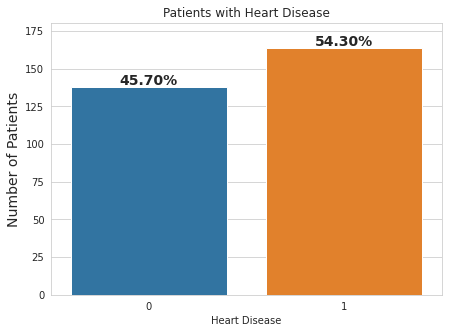

In [ ]:
cust_col = ["#1f77b4","#ff7f0e"] # own custom color scheme 
sns.set_palette(cust_col) # set color scheme
total = len(df)
plt.figure(figsize=(7,5))
g = sns.countplot(x='target', data=df)
g.set_ylabel('Count', fontsize=14)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 1.5,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14, fontweight='bold')
plt.margins(y=0.1)
plt.title('Patients with Heart Disease');
plt.xlabel('Heart Disease');
plt.ylabel('Number of Patients');
plt.show()

In [ ]:
# Feature Selection #Correlation Analysis

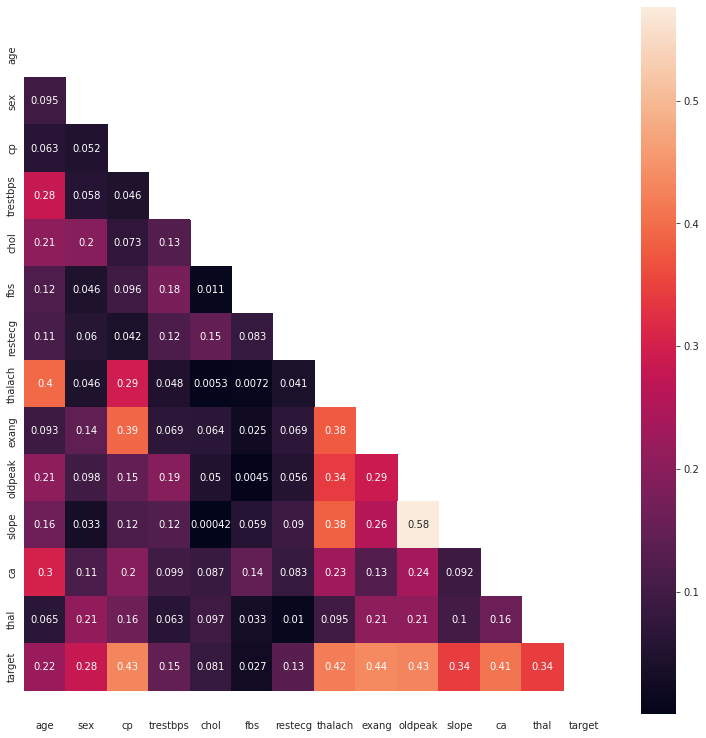

In [ ]:
plt.figure(figsize=(13, 13))
corr = df.corr() 
mask = np.tri(*corr.shape).T 
sns.heatmap(corr.abs(), mask=mask, annot=True)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()

In [ ]:
#Naive Bayes


In [ ]:
# copy data to avoid modifying original data
nb_data = df.copy()

In [ ]:
#split dataset in features and target variable
X =  nb_data.loc[:, nb_data.columns != 'target']
y = nb_data.target # Target featur

In [ ]:
X_t = scale(X)

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_t,y)

GaussianNB()

In [ ]:
print(classification_report(y, nb_model.predict(X_t)))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       138
           1       0.84      0.87      0.85       164

    accuracy                           0.84       302
   macro avg       0.84      0.83      0.84       302
weighted avg       0.84      0.84      0.84       302



In [ ]:
# SVM

In [ ]:
# copy data to avoid modifying original data
svm_data = df.copy()

In [ ]:
#split dataset in features and target variable
X = svm_data.loc[:, svm_data.columns != 'target']
y = svm_data.target # Target feature

In [ ]:
X_t = scale(X)

In [ ]:
from sklearn import svm
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_t,y)

SVC(kernel='linear')

In [ ]:
print(classification_report(y, svm_model.predict(X_t)))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84       138
           1       0.83      0.94      0.88       164

    accuracy                           0.86       302
   macro avg       0.87      0.86      0.86       302
weighted avg       0.87      0.86      0.86       302



In [ ]:
#Models with Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Support Vector Machine (Train-Test Split)

In [ ]:
# copy data to avoid modifying original data
svm2_data = df.copy() 

In [ ]:
#split dataset in features and target variable
X = svm2_data.loc[:, svm2_data.columns != 'target']
y = svm2_data.target


In [ ]:
X_t = scale(X)

In [ ]:
# 80% Training and 20% Testing 
X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size=0.2,random_state=109)

In [ ]:
svm2_model = svm.SVC(kernel='linear')
svm2_model.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
#Support Vector Machine Accuracy on Train data

In [ ]:
print(classification_report(y_train, svm2_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85       106
           1       0.86      0.94      0.90       135

    accuracy                           0.88       241
   macro avg       0.89      0.87      0.88       241
weighted avg       0.88      0.88      0.88       241



In [ ]:
print(classification_report(y_test, svm2_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.62      0.74        32
           1       0.69      0.93      0.79        29

    accuracy                           0.77        61
   macro avg       0.80      0.78      0.77        61
weighted avg       0.81      0.77      0.77        61

